## Figure 3 code
Elena Savidge
<br>
8 Nov 2024

In [1]:
# # load packages
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC
import cmocean
import scipy
from scipy import ndimage
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import rasterio
from rasterio.plot import show
import pyproj
from pyproj import Proj, transform, CRS
#import rioxarray as rxr
import geopandas as gpd
import datetime
from osgeo import gdal
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import geopandas as gpd
from skimage import exposure
from shapely.geometry import box
from skimage.color import rgb2gray
import matplotlib.dates as mdates

/opt/anaconda3/envs/polyarea/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
pyproj.datadir.get_data_dir()

'/opt/anaconda3/share/proj'

In [3]:
cd ../../PhD_Ch3

/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch3


In [4]:
# need this line for pyproj to work on my machine
pyproj.datadir.set_data_dir('/opt/anaconda3/envs/polyarea/share/proj') 

## Load shapefiles
From manually traced deformation shapefiles in QGIS

In [5]:
# large bounding box
largebbox = gpd.read_file('deformation tiffs (qgis)/digitization/bbox.shp')
# convert coordinate system (utm to latlon)
largebbox = largebbox.to_crs("epsg:4326")

# large bounding box
smallbbox = gpd.read_file('deformation tiffs (qgis)/digitization/smallbbox.shp')
# convert coordinate system (utm to latlon)
smallbbox = smallbbox.to_crs("epsg:4326")

#2023
d2023 = gpd.read_file('deformation tiffs (qgis)/digitization/20231213_deform.shp')
# # convert coordinate system (utm to latlon)
d2023 = d2023.to_crs("epsg:4326")

In [6]:
# 2022
d2022 = gpd.read_file('deformation tiffs (qgis)/digitization/20221019_deform.shp')
# convert coordinate system (utm to latlon)
d2022 = d2022.to_crs("epsg:4326")

In [7]:
# 2021
d2021 = gpd.read_file('deformation tiffs (qgis)/digitization/20211222_deform.shp')
# convert coordinate system (utm to latlon)
d2021 = d2021.to_crs("epsg:4326")

In [8]:
# 2020
d2020 = gpd.read_file('deformation tiffs (qgis)/digitization/20201211_deform.shp')
# convert coordinate system (utm to latlon)
d2020 = d2020.to_crs("epsg:4326")

In [9]:
# 2019
d2019 = gpd.read_file('deformation tiffs (qgis)/digitization/20191223_deform.shp')
# # convert coordinate system (utm to latlon)
d2019 = d2019.to_crs("epsg:4326")

In [10]:
# 2018
d2018 = gpd.read_file('deformation tiffs (qgis)/digitization/20181118_deform.shp')
# # convert coordinate system (utm to latlon)
d2018 = d2018.to_crs("epsg:4326")

In [11]:
# 2017
d2017 = gpd.read_file('deformation tiffs (qgis)/digitization/20171013_fixedcrs.shp')
# # convert coordinate system (utm to latlon)
d2017 = d2017.to_crs("epsg:4326")

## Example vis
Sentinel-2 data can be downloaded here: https://browser.dataspace.copernicus.eu/?zoom=5&lat=50.16282&lng=20.78613&themeId=DEFAULT-THEME&visualizationUrl=U2FsdGVkX1%2FmHIsPn%2BXfhahaj9BRImmmIj6RspyvyEGGPZYgr34W6V7S9eb7KcDgIMNjtxwzdQd4RherUl%2FUPX1PoVy%2B7SqkUalH2N4roxDWsDceAsFiuEdOigdhU1jy&datasetId=S2_L2A_CDAS&demSource3D=%22MAPZEN%22&cloudCoverage=30&dateMode=SINGLE

## 2023/12/13 

In [12]:
# Define the file path for the single band (e.g., Red band)
file_path = 'PIG_sentinel2/L1C_T14CMB_A015809_20200316T145252.tif'

# with rasterio.open(red_band_path) as src_red, rasterio.open(green_band_path) as src_green, rasterio.open(blue_band_path) as src_blue:
#     # Read the bands
#     red_band = src_red.read(1)
#     green_band = src_green.read(1)
#     blue_band = src_blue.read(1)

# Open the single band
with rasterio.open(file_path) as file:
    # Read the band
    red_band = file.read(1)
    green_band = file.read(2)
    blue_band = file.read(3)

    # Get the geospatial transformation matrix
    transform = file.transform  # Assumes all bands share the same transform

# Specify the South Polar Stereographic projection
projection = ccrs.SouthPolarStereo()

# Calculate the geographic coordinates of the four corners
width, height = file.width, file.height
upper_left = transform * (0, 0)
upper_right = transform * (width, 0)
lower_left = transform * (0, height)
lower_right = transform * (width, height)

# Get corners in the desired projection
ul_lon, ul_lat = projection.transform_point(upper_left[0], upper_left[1], file.crs)
ur_lon, ur_lat = projection.transform_point(upper_right[0], upper_right[1], file.crs)
ll_lon, ll_lat = projection.transform_point(lower_left[0], lower_left[1], file.crs)
lr_lon, lr_lat = projection.transform_point(lower_right[0], lower_right[1], file.crs)

# # normalize to use full dynamic range for vis
# def normalize_band(band):
#     band_min = band.min()
#     band_max = band.max()
#     return ((band - band_min) / (band_max - band_min))# * 255).astype('uint8')

# red_band_normalized = normalize_band(red_band)
# green_band_normalized = normalize_band(green_band)
# blue_band_normalized = normalize_band(blue_band)

#rgb_image = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))


rgb_image_2023 = np.dstack((red_band, green_band, blue_band))

In [13]:
# sentinel2: blue (B2), green (B3), red (B4)

red_path= 'PIG_sentinel2/20231213/T14CMB_20231213T144249_B04_10m.jp2'
green_path= 'PIG_sentinel2/20231213/T14CMB_20231213T144249_B03_10m.jp2'
blue_path= 'PIG_sentinel2/20231213/T14CMB_20231213T144249_B02_10m.jp2'

# Normalize each band independently
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the single band
with rasterio.open(red_path) as rr, rasterio.open(green_path) as gg, rasterio.open(blue_path) as bb:
    # Read each band
    red_band = rr.read(1)
    green_band = gg.read(1)
    blue_band = bb.read(1)

    # Normalize each band
    red_band_normalized = normalize_band(red_band)
    green_band_normalized = normalize_band(green_band)
    blue_band_normalized = normalize_band(blue_band)

    # Stack the bands into an RGB image
    rgb_image_2023 = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))

    # Get the geospatial transformation matrix
    transform = file.transform  # Assumes all bands share the same transform

    # Specify the South Polar Stereographic projection
    projection = ccrs.SouthPolarStereo(central_longitude=-99.0)  #get central lon from metadata

    # Calculate the geographic coordinates of the four corners
    width, height = file.width, file.height
    upper_left = transform * (0, 0)
    upper_right = transform * (width, 0)
    lower_left = transform * (0, height)
    lower_right = transform * (width, height)

    # Get corners in the desired projection
    ul_lon, ul_lat = projection.transform_point(upper_left[0], upper_left[1], file.crs)
    ur_lon, ur_lat = projection.transform_point(upper_right[0], upper_right[1], file.crs)
    ll_lon, ll_lat = projection.transform_point(lower_left[0], lower_left[1], file.crs)
    lr_lon, lr_lat = projection.transform_point(lower_right[0], lower_right[1], file.crs)


In [14]:
# Apply higher contrast stretching to each color channel
# It calculates the 1st and 99th percentiles of pixel values in each channel and stretches 
# the pixel values to cover the full range between these percentiles
def contrast_stretching(image):
    p1, p99 = np.percentile(image, (1, 99))  # Adjust the percentiles to control the contrast
    return exposure.rescale_intensity(image, in_range=(p1, p99))

red_band_stretched = contrast_stretching(rgb_image_2023[:, :, 0])
green_band_stretched = contrast_stretching(rgb_image_2023[:, :, 1])
blue_band_stretched = contrast_stretching(rgb_image_2023[:, :, 2])

# Apply gamma correction to each color channel
# It applies a power-law transformation to the pixel values, effectively adjusting the brightness of the image.
#A gamma value of 3.5 is used in the code, which has the effect of darkening shadows and enhancing mid-tones and highlights.
def gamma_correction(image, gamma=2):
    return exposure.adjust_gamma(image, gamma)

red_band_corrected = gamma_correction(red_band_stretched)
green_band_corrected = gamma_correction(green_band_stretched)
blue_band_corrected = gamma_correction(blue_band_stretched)

# Stack the corrected channels back into an RGB image
rgb_image_corrected = np.stack((red_band_corrected, green_band_corrected, blue_band_corrected), axis=-1)

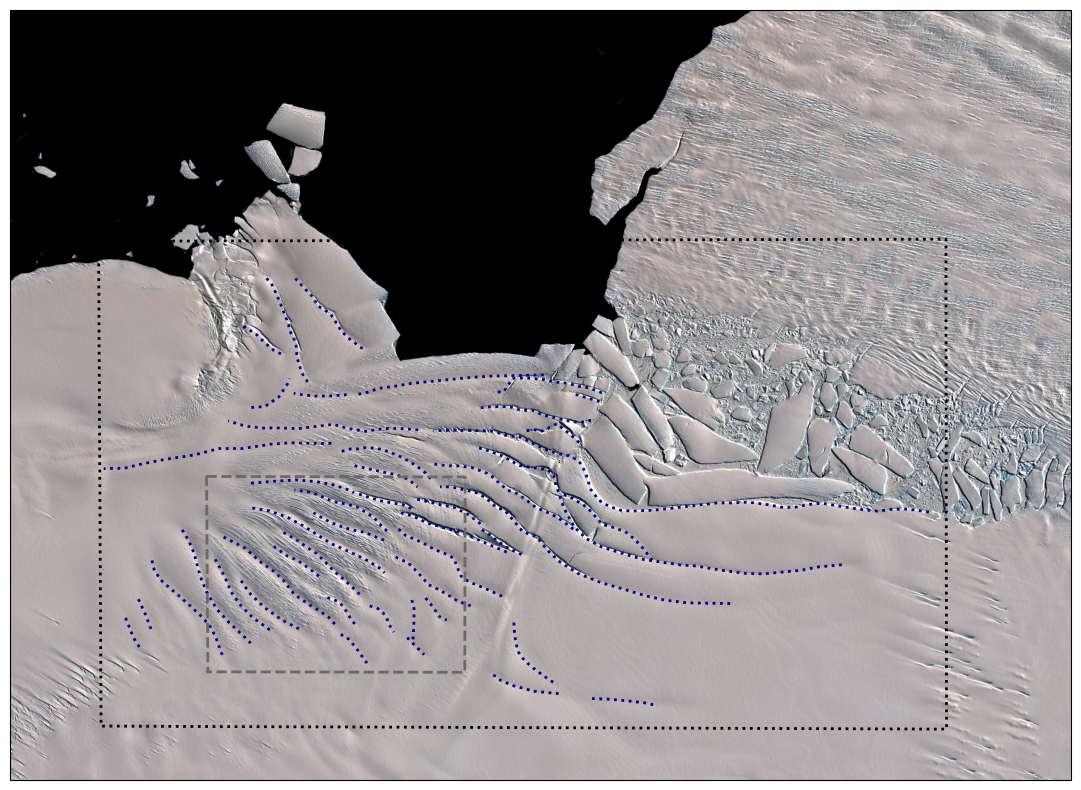

In [15]:
#llcrnrlat=-75.4;urcrnrlat=-74.9;llcrnrlon=-102;urcrnrlon=-99.5
llcrnrlat=-75.32;urcrnrlat=-75.05;llcrnrlon=-102.3;urcrnrlon=-100.8
# Create the plot with the specified CRS
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': projection})

# Set the extent
ax.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], crs=ccrs.PlateCarree())

# Display the Landsat image with improved brightness, higher contrast, and gamma correction
data = ax.imshow(rgb_image_corrected, extent=(ll_lon, ur_lon, ll_lat, ur_lat), origin='upper',transform=projection)
#strain = ax.imshow(effective_strain[113,:,:], extent=(ll_lon_strain, ur_lon_strain, ll_lat_strain, ur_lat_strain),vmin =0, vmax = 1, cmap = 'Reds',transform=projection2,alpha=0.4)

# # Add gridlines with the correct orientation
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=[-102, -101, -100, -99], ylocs=[-75.5, -75, -74, -73, -72], color='k', linestyle=':')
# gl.top_labels = gl.right_labels = False  # Turn off top and right labels

# # Colorbar
# cb = plt.colorbar(strain, fraction=0.04, pad=0.03)
# cb.set_label('Strain', fontsize=14, labelpad=5)

ax.add_geometries(d2023['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'navy',linestyle=':',linewidth=2,zorder=3)#,label='23 March 2018')
ax.add_geometries(largebbox['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'k',linestyle=':',linewidth=2,zorder=3)#,label='23 March 2018')
ax.add_geometries(smallbbox['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'dimgrey',linestyle='--',linewidth=2,zorder=3)#,label='23 March 2018')
#ax.add_geometries(sh3['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'm',linestyle='-',linewidth=2,zorder=3)#,label='23 March 2018')

# fontprops = fm.FontProperties(size=20)
# scalebar = AnchoredSizeBar(ax.transData,
#                            10000, '10 km', 'lower left',
#                            pad=0.5,
#                            color='k',
#                            frameon=False,
#                            size_vertical=250,
#                            fill_bar=True,
#                            sep=3.5,
#                            fontproperties=fontprops)
# ax.add_artist(scalebar)

# Turn off axis
#ax.axis('off')

plt.show()



In [17]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch3'

## 2017/10/13

In [13]:
# sentinel2: blue (B2), green (B3), red (B4)

red_path= 'PIG_sentinel2/20171013/T14CMB_20171013T145251_B04.jp2'
green_path= 'PIG_sentinel2/20171013/T14CMB_20171013T145251_B03.jp2'
blue_path= 'PIG_sentinel2/20171013/T14CMB_20171013T145251_B02.jp2'

# Normalize each band independently
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the single band
with rasterio.open(red_path) as rr, rasterio.open(green_path) as gg, rasterio.open(blue_path) as bb:
    # Read each band
    red_band = rr.read(1)
    green_band = gg.read(1)
    blue_band = bb.read(1)

    # Normalize each band
    red_band_normalized = normalize_band(red_band)
    green_band_normalized = normalize_band(green_band)
    blue_band_normalized = normalize_band(blue_band)

    # Stack the bands into an RGB image
    rgb_image_2017 = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))

    # Get the geospatial transformation matrix
    transform = file.transform  # Assumes all bands share the same transform

    # Specify the South Polar Stereographic projection
    projection = ccrs.SouthPolarStereo(central_longitude=-99.0)  #get central lon from metadata

    # Calculate the geographic coordinates of the four corners
    width, height = file.width, file.height
    upper_left = transform * (0, 0)
    upper_right = transform * (width, 0)
    lower_left = transform * (0, height)
    lower_right = transform * (width, height)

    # Get corners in the desired projection
    ul_lon, ul_lat = projection.transform_point(upper_left[0], upper_left[1], file.crs)
    ur_lon, ur_lat = projection.transform_point(upper_right[0], upper_right[1], file.crs)
    ll_lon, ll_lat = projection.transform_point(lower_left[0], lower_left[1], file.crs)
    lr_lon, lr_lat = projection.transform_point(lower_right[0], lower_right[1], file.crs)


In [14]:
# Apply higher contrast stretching to each color channel
# It calculates the 1st and 99th percentiles of pixel values in each channel and stretches 
# the pixel values to cover the full range between these percentiles
def contrast_stretching(image):
    p1, p99 = np.percentile(image, (1, 99))  # Adjust the percentiles to control the contrast
    return exposure.rescale_intensity(image, in_range=(p1, p99))

red_band_stretched = contrast_stretching(rgb_image_2017[:, :, 0])
green_band_stretched = contrast_stretching(rgb_image_2017[:, :, 1])
blue_band_stretched = contrast_stretching(rgb_image_2017[:, :, 2])

# Apply gamma correction to each color channel
# It applies a power-law transformation to the pixel values, effectively adjusting the brightness of the image.
#A gamma value of 3.5 is used in the code, which has the effect of darkening shadows and enhancing mid-tones and highlights.
def gamma_correction(image, gamma=1):
    return exposure.adjust_gamma(image, gamma)

red_band_corrected = gamma_correction(red_band_stretched)
green_band_corrected = gamma_correction(green_band_stretched)
blue_band_corrected = gamma_correction(blue_band_stretched)

# Stack the corrected channels back into an RGB image
rgb_image_corrected = np.stack((red_band_corrected, green_band_corrected, blue_band_corrected), axis=-1)

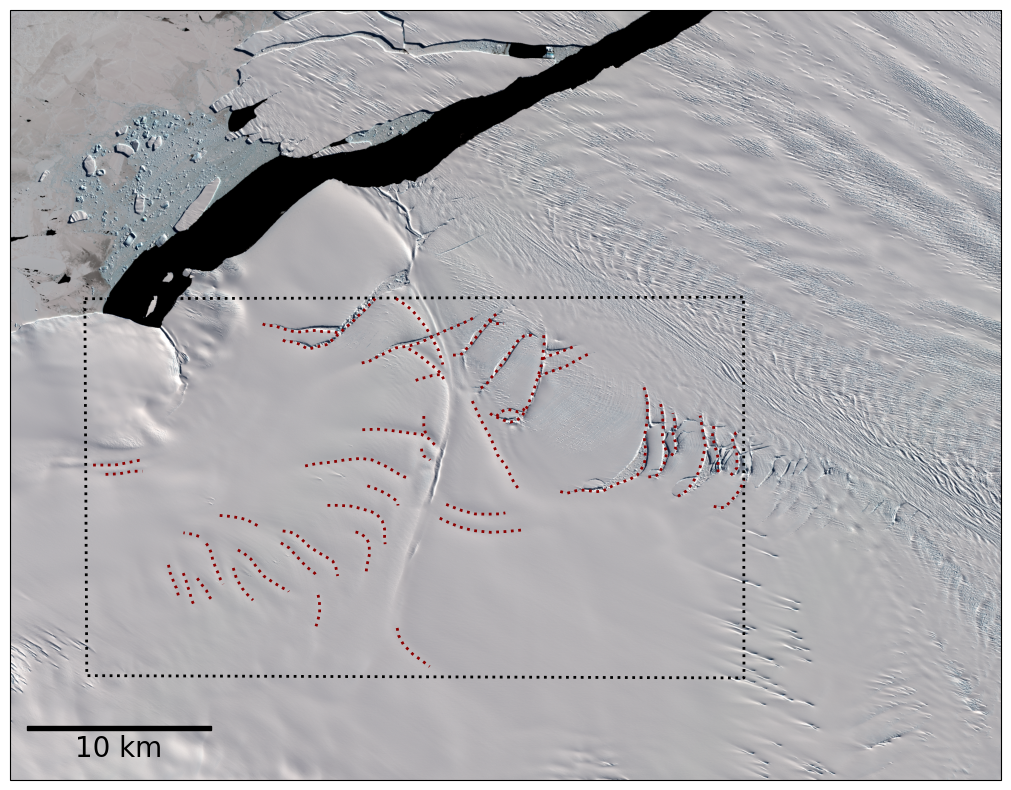

In [15]:
#llcrnrlat=-75.4;urcrnrlat=-74.9;llcrnrlon=-102;urcrnrlon=-99.5
llcrnrlat=-75.35;urcrnrlat=-75;llcrnrlon=-102.3;urcrnrlon=-100.5
# Create the plot with the specified CRS
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': projection})

# Set the extent
ax.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], crs=ccrs.PlateCarree())

# Display the Landsat image with improved brightness, higher contrast, and gamma correction
data = ax.imshow(rgb_image_corrected, extent=(ll_lon, ur_lon, ll_lat, ur_lat), origin='upper',transform=projection)
#strain = ax.imshow(effective_strain[113,:,:], extent=(ll_lon_strain, ur_lon_strain, ll_lat_strain, ur_lat_strain),vmin =0, vmax = 1, cmap = 'Reds',transform=projection2,alpha=0.4)

# # Add gridlines with the correct orientation
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=[-102, -101, -100, -99], ylocs=[-75.5, -75, -74, -73, -72], color='k', linestyle=':')
# gl.top_labels = gl.right_labels = False  # Turn off top and right labels

# # Colorbar
# cb = plt.colorbar(strain, fraction=0.04, pad=0.03)
# cb.set_label('Strain', fontsize=14, labelpad=5)

#ax.add_geometries(sh1test['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'navy',linestyle='-',linewidth=2,zorder=3)#,label='23 March 2018')
ax.add_geometries(largebbox['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'k',linestyle=':',linewidth=2,zorder=3)#,label='23 March 2018')
ax.add_geometries(d2017['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'darkred',linestyle=':',linewidth=2,zorder=3)#,label='23 March 2018')

fontprops = fm.FontProperties(size=20)
scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower left',
                           pad=0.5,
                           color='k',
                           frameon=False,
                           size_vertical=250,
                           fill_bar=True,
                           sep=3.5,
                           fontproperties=fontprops)
ax.add_artist(scalebar)

# Turn off axis
#ax.axis('off')

plt.show()


## Clip smaller subset (defined by small bbox -- we'll track the traced deformation through time in this smaller region)

In [16]:
# Load the shapefiles
input_shapefile = d2017
clip_shapefile = smallbbox

# Get the bounding box of the clip polygon
clip_bbox = box(*clip_shapefile.total_bounds)

# Reproject the clip shapefile to match the CRS of the input shapefile
clip_shapefile = clip_shapefile.to_crs(input_shapefile.crs)

# Clip the input shapefile to the extent of the clip polygon
clipped_shapefile17 = gpd.clip(input_shapefile, clip_bbox)


In [17]:
clipped_shapefile17['length_m'].sum()

33405.008

# Visualize

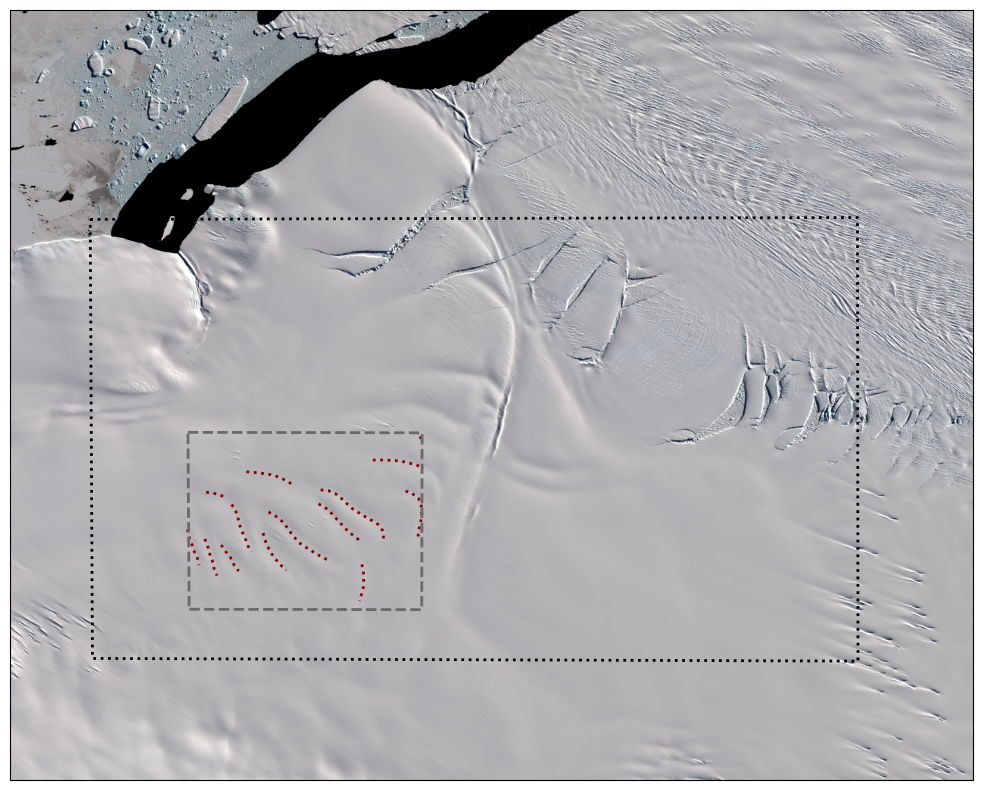

In [18]:
#llcrnrlat=-75.4;urcrnrlat=-74.9;llcrnrlon=-102;urcrnrlon=-99.5
llcrnrlat=-75.35;urcrnrlat=-75.05;llcrnrlon=-102.3;urcrnrlon=-100.8
# Create the plot with the specified CRS
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': projection})

# Set the extent
ax.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], crs=ccrs.PlateCarree())

# Display the Landsat image with improved brightness, higher contrast, and gamma correction
data = ax.imshow(rgb_image_corrected, extent=(ll_lon, ur_lon, ll_lat, ur_lat), origin='upper',transform=projection)
#strain = ax.imshow(effective_strain[113,:,:], extent=(ll_lon_strain, ur_lon_strain, ll_lat_strain, ur_lat_strain),vmin =0, vmax = 1, cmap = 'Reds',transform=projection2,alpha=0.4)

# # Add gridlines with the correct orientation
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=[-102, -101, -100, -99], ylocs=[-75.5, -75, -74, -73, -72], color='k', linestyle=':')
# gl.top_labels = gl.right_labels = False  # Turn off top and right labels

# # Colorbar
# cb = plt.colorbar(strain, fraction=0.04, pad=0.03)
# cb.set_label('Strain', fontsize=14, labelpad=5)

ax.add_geometries(clipped_shapefile17['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'darkred',linestyle=':',linewidth=2,zorder=3)#,label='23 March 2018')
ax.add_geometries(largebbox['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'k',linestyle=':',linewidth=2,zorder=3)#,label='23 March 2018')
ax.add_geometries(smallbbox['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'dimgrey',linestyle='--',linewidth=2,zorder=3)#,label='23 March 2018')
#ax.add_geometries(sh3['geometry'], crs=ccrs.PlateCarree(),facecolor='none', edgecolor = 'm',linestyle='-',linewidth=2,zorder=3)#,label='23 March 2018')

# fontprops = fm.FontProperties(size=20)
# scalebar = AnchoredSizeBar(ax.transData,
#                            10000, '10 km', 'lower left',
#                            pad=0.5,
#                            color='k',
#                            frameon=False,
#                            size_vertical=250,
#                            fill_bar=True,
#                            sep=3.5,
#                            fontproperties=fontprops)
# ax.add_artist(scalebar)

# Turn off axis
#ax.axis('off')

plt.show()

## Now that we've looked at the last scene (2023) and the first (2017), we repeat this, one scene per year from 2017 and 2023, now only looking at that smaller bouding box (dashed grey bos baove)

Let's go from 2023 to 2017
<br>
Here, we don't need the imagery, that was just for visualization above. Here, we are reading in the shapefiles of traced deformation that were manually traced in QGIS

### 2023

In [19]:
# Load the shapefiles
input_shapefile = d2023
clip_shapefile = smallbbox

# Get the bounding box of the clip polygon
clip_bbox = box(*clip_shapefile.total_bounds)

# Reproject the clip shapefile to match the CRS of the input shapefile
clip_shapefile = clip_shapefile.to_crs(input_shapefile.crs)

# Clip the input shapefile to the extent of the clip polygon
clipped_shapefile23 = gpd.clip(input_shapefile, clip_bbox)

### 2022

In [20]:
# Load the shapefiles
input_shapefile = d2022
clip_shapefile = smallbbox

# Get the bounding box of the clip polygon
clip_bbox = box(*clip_shapefile.total_bounds)

# Reproject the clip shapefile to match the CRS of the input shapefile
clip_shapefile = clip_shapefile.to_crs(input_shapefile.crs)

# Clip the input shapefile to the extent of the clip polygon
clipped_shapefile22 = gpd.clip(input_shapefile, clip_bbox)


### 2021

In [21]:
# Load the shapefiles
input_shapefile = d2021
clip_shapefile = smallbbox

# Get the bounding box of the clip polygon
clip_bbox = box(*clip_shapefile.total_bounds)

# Reproject the clip shapefile to match the CRS of the input shapefile
clip_shapefile = clip_shapefile.to_crs(input_shapefile.crs)

# Clip the input shapefile to the extent of the clip polygon
clipped_shapefile21 = gpd.clip(input_shapefile, clip_bbox)

### 2020

In [22]:
# Load the shapefiles
input_shapefile = d2020
clip_shapefile = smallbbox

# Get the bounding box of the clip polygon
clip_bbox = box(*clip_shapefile.total_bounds)

# Reproject the clip shapefile to match the CRS of the input shapefile
clip_shapefile = clip_shapefile.to_crs(input_shapefile.crs)

# Clip the input shapefile to the extent of the clip polygon
clipped_shapefile20 = gpd.clip(input_shapefile, clip_bbox)

### 2019

In [23]:
# Load the shapefiles
input_shapefile = d2019
clip_shapefile = smallbbox

# Get the bounding box of the clip polygon
clip_bbox = box(*clip_shapefile.total_bounds)

# Reproject the clip shapefile to match the CRS of the input shapefile
clip_shapefile = clip_shapefile.to_crs(input_shapefile.crs)

# Clip the input shapefile to the extent of the clip polygon
clipped_shapefile19 = gpd.clip(input_shapefile, clip_bbox)

### 2018

In [24]:
# Load the shapefiles
input_shapefile = d2018
clip_shapefile = smallbbox

# Get the bounding box of the clip polygon
clip_bbox = box(*clip_shapefile.total_bounds)

# Reproject the clip shapefile to match the CRS of the input shapefile
clip_shapefile = clip_shapefile.to_crs(input_shapefile.crs)

# Clip the input shapefile to the extent of the clip polygon
clipped_shapefile18 = gpd.clip(input_shapefile, clip_bbox)

### 2017

In [25]:
# Load the shapefiles
input_shapefile = d2017
clip_shapefile = smallbbox

# Get the bounding box of the clip polygon
clip_bbox = box(*clip_shapefile.total_bounds)

# Reproject the clip shapefile to match the CRS of the input shapefile
clip_shapefile = clip_shapefile.to_crs(input_shapefile.crs)

# Clip the input shapefile to the extent of the clip polygon
clipped_shapefile17 = gpd.clip(input_shapefile, clip_bbox)

## Now look at some numbers

In [26]:
# avg length: sum total length/ number of individual segments (or rows in dataframe)

avg_length_m = [
    (clipped_shapefile17['length_m'].sum() / 1000)/ clipped_shapefile17.shape[0],
    (clipped_shapefile18['length_m'].sum() / 1000)/ clipped_shapefile18.shape[0],
    (clipped_shapefile19['length_m'].sum() / 1000)/ clipped_shapefile19.shape[0],
    (clipped_shapefile20['length_m'].sum() / 1000)/ clipped_shapefile20.shape[0],
    (clipped_shapefile21['length_m'].sum() / 1000)/ clipped_shapefile21.shape[0],
    (clipped_shapefile22['length_m'].sum() / 1000)/ clipped_shapefile22.shape[0],
    (clipped_shapefile23['length_m'].sum() / 1000)/ clipped_shapefile23.shape[0]
]

In [27]:
avg_length_m #per year

[2.386072,
 2.7484562142857145,
 2.853164428571428,
 2.5919435416666667,
 4.129276730769231,
 4.24919908,
 3.9505394230769233]

## Compile info in a dataframe

In [28]:
deform_m = [
    clipped_shapefile17['length_m'].sum() / 1000,
    clipped_shapefile18['length_m'].sum() / 1000,
    clipped_shapefile19['length_m'].sum() / 1000,
    clipped_shapefile20['length_m'].sum() / 1000,
    clipped_shapefile21['length_m'].sum() / 1000,
    clipped_shapefile22['length_m'].sum() / 1000,
    clipped_shapefile23['length_m'].sum() / 1000
]

# using accessible color palette from https://personal.sron.nl/~pault/
ccc = ['#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255'] 
years = np.array(['2017-10-13', '2018-11-18', '2019-12-23', '2020-12-11', '2021-12-22', '2022-10-19', '2023-12-13'])

df = pd.DataFrame(deform_m, columns=['deformation_km'])
df['avg_length_segment'] = avg_length_m
df['year'] = years
df['date'] = pd.to_datetime(df['year'], format='%Y-%m-%d')
df['color'] = ccc

# Display the DataFrame
df


deformation_km  avg_length_segment        year       date    color
0       33.405008            2.386072  2017-10-13 2017-10-13  #88CCEE
1       38.478387            2.748456  2018-11-18 2018-11-18  #44AA99
2       39.944302            2.853164  2019-12-23 2019-12-23  #117733
3       62.206645            2.591944  2020-12-11 2020-12-11  #999933
4      107.361195            4.129277  2021-12-22 2021-12-22  #DDCC77
5      106.229977            4.249199  2022-10-19 2022-10-19  #CC6677
6      102.714025            3.950539  2023-12-13 2023-12-13  #882255

## Visualize the manually traced deformation over time

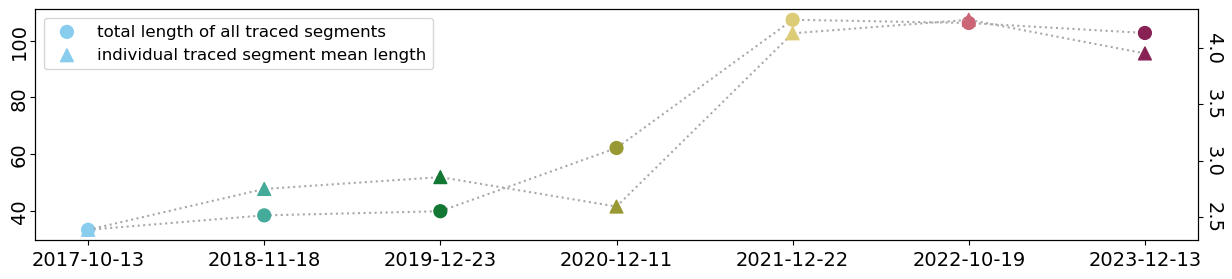

In [29]:
plt.figure(figsize=(15, 3))

# Plot 'deformation_km' on the primary y-axis
p1 = plt.plot(df['year'], df['deformation_km'], ':', color='darkgrey', zorder=1)
p2 = plt.scatter(df['year'], df['deformation_km'], c=df['color'], s=85, zorder=2, label='total length of all traced segments')

# Create a secondary y-axis for 'pixel_variance'
ax = plt.gca()
ax2 = ax.twinx()
p4 = plt.plot(df['year'], df['avg_length_segment'], ':', color='darkgrey', zorder=1)
p3 = ax2.scatter(df['year'], df['avg_length_segment'], c=df['color'], marker = '^',s=85, zorder=2, label='individual traced segment mean length')

# Set y-ticks for both y-axes
ax.tick_params(axis='y', labelsize=14,rotation=90,pad=1)
ax2.tick_params(axis='y', labelsize=14,rotation=270,pad=1)
ax.tick_params(axis='x', labelsize=14)

# Centering y-axis labels
for label in ax.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')

for label in ax2.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')

# Format x-axis as years
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# # Calving events
# calving1 = ax2.axvline(datetime.datetime(2017, 10, 1), c='lightgrey', alpha=0.8, linewidth=3, zorder=-1)
# calving1 = ax2.axvline(datetime.datetime(2018, 10, 28), c='lightgrey', alpha=0.8, linewidth=3, label='calving events')
# calving2 = ax2.axvline(datetime.datetime(2020, 2, 10), c='lightgrey', alpha=0.8, linewidth=3, )

# Set labels for y-axes
# ax.set_ylabel('Total surface deformation [km]', fontsize=14)
# ax2.set_ylabel('Avg length of individual segments [km]', fontsize=14)

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left',fontsize=12)

# Display the plot
#plt.show()
#plt.savefig('traced_deform2.png', format='png', dpi=400)

## Now look at deformation through systematic spectral analysis

## Read Sentinel-2 imagery

## 2023

In [30]:
# sentinel2: blue (B2), green (B3), red (B4)

red_path= 'PIG_sentinel2/20231213/T14CMB_20231213T144249_B04_10m.jp2'
green_path= 'PIG_sentinel2/20231213/T14CMB_20231213T144249_B03_10m.jp2'
blue_path= 'PIG_sentinel2/20231213/T14CMB_20231213T144249_B02_10m.jp2'

# Normalize each band independently
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the single band
with rasterio.open(red_path) as rr, rasterio.open(green_path) as gg, rasterio.open(blue_path) as bb:
    # Read each band
    red_band = rr.read(1)
    green_band = gg.read(1)
    blue_band = bb.read(1)

    # Normalize each band
    red_band_normalized = normalize_band(red_band)
    green_band_normalized = normalize_band(green_band)
    blue_band_normalized = normalize_band(blue_band)

    # Stack the bands into an RGB image
    rgb_image_2023 = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))

## 2022

In [31]:
# sentinel2: blue (B2), green (B3), red (B4)

red_path= 'PIG_sentinel2/20221019/T14CMB_20221019T144249_B04.jp2'
green_path= 'PIG_sentinel2/20221019/T14CMB_20221019T144249_B03.jp2'
blue_path= 'PIG_sentinel2/20221019/T14CMB_20221019T144249_B02.jp2'

# Normalize each band independently
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the single band
with rasterio.open(red_path) as rr, rasterio.open(green_path) as gg, rasterio.open(blue_path) as bb:
    # Read each band
    red_band = rr.read(1)
    green_band = gg.read(1)
    blue_band = bb.read(1)

    # Normalize each band
    red_band_normalized = normalize_band(red_band)
    green_band_normalized = normalize_band(green_band)
    blue_band_normalized = normalize_band(blue_band)

    # Stack the bands into an RGB image
    rgb_image_2022 = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))

## 2021

In [32]:
# sentinel2: blue (B2), green (B3), red (B4)

red_path= 'PIG_sentinel2/20211222/T14CMB_20211222T151259_B04_10m.jp2'
green_path= 'PIG_sentinel2/20211222/T14CMB_20211222T151259_B03_10m.jp2'
blue_path= 'PIG_sentinel2/20211222/T14CMB_20211222T151259_B02_10m.jp2'

# Normalize each band independently
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the single band
with rasterio.open(red_path) as rr, rasterio.open(green_path) as gg, rasterio.open(blue_path) as bb:
    # Read each band
    red_band = rr.read(1)
    green_band = gg.read(1)
    blue_band = bb.read(1)

    # Normalize each band
    red_band_normalized = normalize_band(red_band)
    green_band_normalized = normalize_band(green_band)
    blue_band_normalized = normalize_band(blue_band)

    # Stack the bands into an RGB image
    rgb_image_2021 = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))

## 2020

In [33]:
# sentinel2: blue (B2), green (B3), red (B4)

red_path= 'PIG_sentinel2/20201211/T14CMB_20201211T145249_B04_10m.jp2'
green_path= 'PIG_sentinel2/20201211/T14CMB_20201211T145249_B03_10m.jp2'
blue_path= 'PIG_sentinel2/20201211/T14CMB_20201211T145249_B02_10m.jp2'

# Normalize each band independently
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the single band
with rasterio.open(red_path) as rr, rasterio.open(green_path) as gg, rasterio.open(blue_path) as bb:
    # Read each band
    red_band = rr.read(1)
    green_band = gg.read(1)
    blue_band = bb.read(1)

    # Normalize each band
    red_band_normalized = normalize_band(red_band)
    green_band_normalized = normalize_band(green_band)
    blue_band_normalized = normalize_band(blue_band)

    # Stack the bands into an RGB image
    rgb_image_2020 = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))

## 2019

In [34]:
# sentinel2: blue (B2), green (B3), red (B4)

red_path= 'PIG_sentinel2/20191223/T14CMB_20191223T151259_B04.jp2'
green_path= 'PIG_sentinel2/20191223/T14CMB_20191223T151259_B03.jp2'
blue_path= 'PIG_sentinel2/20191223/T14CMB_20191223T151259_B02.jp2'

# Normalize each band independently
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the single band
with rasterio.open(red_path) as rr, rasterio.open(green_path) as gg, rasterio.open(blue_path) as bb:
    # Read each band
    red_band = rr.read(1)
    green_band = gg.read(1)
    blue_band = bb.read(1)

    # Normalize each band
    red_band_normalized = normalize_band(red_band)
    green_band_normalized = normalize_band(green_band)
    blue_band_normalized = normalize_band(blue_band)

    # Stack the bands into an RGB image
    rgb_image_2019 = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))

## 2018

In [35]:
# sentinel2: blue (B2), green (B3), red (B4)

red_path= 'PIG_sentinel2/20181118/T14CMB_20181118T151259_B04.jp2'
green_path= 'PIG_sentinel2/20181118/T14CMB_20181118T151259_B03.jp2'
blue_path= 'PIG_sentinel2/20181118/T14CMB_20181118T151259_B02.jp2'

# Normalize each band independently
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the single band
with rasterio.open(red_path) as rr, rasterio.open(green_path) as gg, rasterio.open(blue_path) as bb:
    # Read each band
    red_band = rr.read(1)
    green_band = gg.read(1)
    blue_band = bb.read(1)

    # Normalize each band
    red_band_normalized = normalize_band(red_band)
    green_band_normalized = normalize_band(green_band)
    blue_band_normalized = normalize_band(blue_band)

    # Stack the bands into an RGB image
    rgb_image_2018 = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))


## 2017

In [36]:
# sentinel2: blue (B2), green (B3), red (B4)

red_path= 'PIG_sentinel2/20171013/T14CMB_20171013T145251_B04.jp2'
green_path= 'PIG_sentinel2/20171013/T14CMB_20171013T145251_B03.jp2'
blue_path= 'PIG_sentinel2/20171013/T14CMB_20171013T145251_B02.jp2'

# Normalize each band independently
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the single band
with rasterio.open(red_path) as rr, rasterio.open(green_path) as gg, rasterio.open(blue_path) as bb:
    # Read each band
    red_band = rr.read(1)
    green_band = gg.read(1)
    blue_band = bb.read(1)

    # Normalize each band
    red_band_normalized = normalize_band(red_band)
    green_band_normalized = normalize_band(green_band)
    blue_band_normalized = normalize_band(blue_band)

    # Stack the bands into an RGB image
    rgb_image_2017 = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))

## Pixel statistics (within small bbox)

In [37]:
# Bounding box common to all years of observation (define once)

# Define the bounding box coordinates in lat/lon
#llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon = -75.32, -75.05, -102.3, -100.8
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat = smallbbox.total_bounds

# Create a Shapely box object representing the bounding box
bbox = box(llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat)

# Convert the bounding box to a GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox], crs="EPSG:4326")

# Assuming your RGB image CRS is UTM (replace with the correct EPSG code)
utm_crs = "EPSG:32714"  # Update to your specific UTM zone CRS, here: utm zone 14S
bbox_gdf_utm = bbox_gdf.to_crs(utm_crs)

In [38]:
# Function to convert geographic coordinates to pixel coordinates
def get_pixel_coords(bounds, transform):
    left, bottom, right, top = bounds
    row_min, col_min = rasterio.transform.rowcol(transform, left, top)
    row_max, col_max = rasterio.transform.rowcol(transform, right, bottom)
    return row_min, row_max, col_min, col_max

# Get the bounding box coordinates in UTM
bounds_utm = bbox_gdf_utm.total_bounds

# Open one of the bands to get the transformation matrix
with rasterio.open(red_path) as src:
    transform = src.transform

# Get the pixel coordinates of the bounding box
row_min, row_max, col_min, col_max = get_pixel_coords(bounds_utm, transform)

In [39]:
# Function to calculate statistics for each color channel
def calculate_stats(rgb_array):
    stats = [
        {'Color': 'Red', 'Statistic': 'Mean', 'Value': np.mean(rgb_array[:, :, 0])},
        {'Color': 'Red', 'Statistic': 'Variance', 'Value': np.var(rgb_array[:, :, 0])},
        {'Color': 'Red', 'Statistic': 'Standard Deviation', 'Value': np.std(rgb_array[:, :, 0])},
        {'Color': 'Green', 'Statistic': 'Mean', 'Value': np.mean(rgb_array[:, :, 1])},
        {'Color': 'Green', 'Statistic': 'Variance', 'Value': np.var(rgb_array[:, :, 1])},
        {'Color': 'Green', 'Statistic': 'Standard Deviation', 'Value': np.std(rgb_array[:, :, 1])},
        {'Color': 'Blue', 'Statistic': 'Mean', 'Value': np.mean(rgb_array[:, :, 2])},
        {'Color': 'Blue', 'Statistic': 'Variance', 'Value': np.var(rgb_array[:, :, 2])},
        {'Color': 'Blue', 'Statistic': 'Standard Deviation', 'Value': np.std(rgb_array[:, :, 2])}
    ]
    return stats

# Function to calculate statistics for the entire image
def calculate_overall_stats(rgb_array):
    flattened = rgb_array.flatten()
    overall_stats = [
        {'Color': 'Overall', 'Statistic': 'Mean', 'Value': np.mean(flattened)},
        {'Color': 'Overall', 'Statistic': 'Variance', 'Value': np.var(flattened)},
        {'Color': 'Overall', 'Statistic': 'Standard Deviation', 'Value': np.std(flattened)}
    ]
    return overall_stats

## Clip the above scenes to the small bounding box

In [40]:
# Clip the RGB image using the pixel coordinates
clipped_rgb_image2023 = rgb_image_2023[row_min:row_max, col_min:col_max, :]
clipped_rgb_image2022 = rgb_image_2022[row_min:row_max, col_min:col_max, :]
clipped_rgb_image2021 = rgb_image_2021[row_min:row_max, col_min:col_max, :]
clipped_rgb_image2020 = rgb_image_2020[row_min:row_max, col_min:col_max, :]
clipped_rgb_image2019 = rgb_image_2019[row_min:row_max, col_min:col_max, :]
clipped_rgb_image2018 = rgb_image_2018[row_min:row_max, col_min:col_max, :]
clipped_rgb_image2017 = rgb_image_2017[row_min:row_max, col_min:col_max, :]

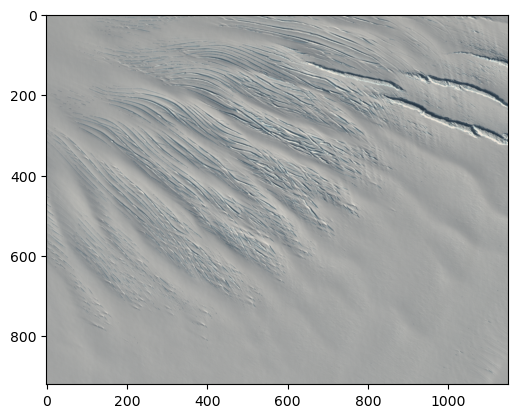

In [41]:
# Vis: we are calculating pixel stats within this subsetted scene
plt.imshow(clipped_rgb_image2023)

## Now calculate stats for each and and create dataframe to contain this data

## 2023

In [42]:
# Call fcts
channel_stats23 = calculate_stats(clipped_rgb_image2023)
overall_stats23 = calculate_overall_stats(clipped_rgb_image2023)

# Create DataFrame
stats_df23 = pd.DataFrame(channel_stats23 + overall_stats23)
stats_df23 

Color           Statistic       Value
0       Red                Mean  159.323860
1       Red            Variance  339.809505
2       Red  Standard Deviation   18.433923
3     Green                Mean  162.090895
4     Green            Variance  262.079827
5     Green  Standard Deviation   16.188880
6      Blue                Mean  161.483952
7      Blue            Variance  194.125088
8      Blue  Standard Deviation   13.932878
9   Overall                Mean  160.966236
10  Overall            Variance  266.748235
11  Overall  Standard Deviation   16.332429

## 2022

In [43]:
# Call fcts
channel_stats22 = calculate_stats(clipped_rgb_image2022)
overall_stats22 = calculate_overall_stats(clipped_rgb_image2022)

# Create DataFrame
stats_df22 = pd.DataFrame(channel_stats22 + overall_stats22)
stats_df22

Color           Statistic       Value
0       Red                Mean   80.485888
1       Red            Variance   98.882970
2       Red  Standard Deviation    9.943992
3     Green                Mean   84.300241
4     Green            Variance   84.369889
5     Green  Standard Deviation    9.185308
6      Blue                Mean   91.121987
7      Blue            Variance   71.073183
8      Blue  Standard Deviation    8.430491
9   Overall                Mean   85.302706
10  Overall            Variance  104.132246
11  Overall  Standard Deviation   10.204521

## 2021

In [44]:
# Call fcts
channel_stats21 = calculate_stats(clipped_rgb_image2021)
overall_stats21 = calculate_overall_stats(clipped_rgb_image2021)

# Create DataFrame
stats_df21 = pd.DataFrame(channel_stats21 + overall_stats21)
stats_df21 

Color           Statistic       Value
0       Red                Mean  171.118318
1       Red            Variance   92.012992
2       Red  Standard Deviation    9.592340
3     Green                Mean  174.934260
4     Green            Variance   73.588019
5     Green  Standard Deviation    8.578346
6      Blue                Mean  180.265792
7      Blue            Variance   59.709806
8      Blue  Standard Deviation    7.727212
9   Overall                Mean  175.439457
10  Overall            Variance   89.177262
11  Overall  Standard Deviation    9.443371

## 2020

In [45]:
# Call fcts
channel_stats20 = calculate_stats(clipped_rgb_image2020)
overall_stats20 = calculate_overall_stats(clipped_rgb_image2020)

# Create DataFrame
stats_df20 = pd.DataFrame(channel_stats20 + overall_stats20)
stats_df20

Color           Statistic       Value
0       Red                Mean  165.465815
1       Red            Variance   43.337135
2       Red  Standard Deviation    6.583095
3     Green                Mean  167.822964
4     Green            Variance   36.661390
5     Green  Standard Deviation    6.054865
6      Blue                Mean  171.655274
7      Blue            Variance   30.635401
8      Blue  Standard Deviation    5.534926
9   Overall                Mean  168.314684
10  Overall            Variance   43.383770
11  Overall  Standard Deviation    6.586636

## 2019

In [46]:
# Call fcts
channel_stats19 = calculate_stats(clipped_rgb_image2019)
overall_stats19 = calculate_overall_stats(clipped_rgb_image2019)

# Create DataFrame
stats_df19 = pd.DataFrame(channel_stats19 + overall_stats19)
stats_df19

Color           Statistic       Value
0       Red                Mean  124.318887
1       Red            Variance    7.113802
2       Red  Standard Deviation    2.667171
3     Green                Mean  132.370989
4     Green            Variance    6.520103
5     Green  Standard Deviation    2.553449
6      Blue                Mean  141.160051
7      Blue            Variance    5.550859
8      Blue  Standard Deviation    2.356026
9   Overall                Mean  132.616642
10  Overall            Variance   53.695897
11  Overall  Standard Deviation    7.327748

## 2018

In [47]:
# Call fcts
channel_stats18 = calculate_stats(clipped_rgb_image2018)
overall_stats18 = calculate_overall_stats(clipped_rgb_image2018)

# Create DataFrame
stats_df18 = pd.DataFrame(channel_stats18 + overall_stats18)
stats_df18

Color           Statistic       Value
0       Red                Mean  119.109026
1       Red            Variance    7.371385
2       Red  Standard Deviation    2.715030
3     Green                Mean  123.643589
4     Green            Variance    6.076851
5     Green  Standard Deviation    2.465127
6      Blue                Mean  130.871247
7      Blue            Variance    4.743645
8      Blue  Standard Deviation    2.177991
9   Overall                Mean  124.541287
10  Overall            Variance   29.525200
11  Overall  Standard Deviation    5.433710

## 2017

In [48]:
# Call fcts
channel_stats17 = calculate_stats(clipped_rgb_image2017)
overall_stats17 = calculate_overall_stats(clipped_rgb_image2017)

# Create DataFrame
stats_df17 = pd.DataFrame(channel_stats17 + overall_stats17)
stats_df17

Color           Statistic      Value
0       Red                Mean  73.540765
1       Red            Variance   4.637366
2       Red  Standard Deviation   2.153455
3     Green                Mean  78.904104
4     Green            Variance   4.342624
5     Green  Standard Deviation   2.083896
6      Blue                Mean  84.428792
7      Blue            Variance   3.721938
8      Blue  Standard Deviation   1.929232
9   Overall                Mean  78.957887
10  Overall            Variance  23.993609
11  Overall  Standard Deviation   4.898327

## Calc stuff and prep to get into dataframe

In [49]:
# get overall variance in year uyear to add to previous deformation dataframe
var17 = stats_df17[(stats_df17.Color == 'Overall') & (stats_df17.Statistic == 'Variance')].Value.iloc[0]
var18 = stats_df18[(stats_df18.Color == 'Overall') & (stats_df18.Statistic == 'Variance')].Value.iloc[0]
var19 = stats_df19[(stats_df19.Color == 'Overall') & (stats_df19.Statistic == 'Variance')].Value.iloc[0]
var20 = stats_df20[(stats_df20.Color == 'Overall') & (stats_df20.Statistic == 'Variance')].Value.iloc[0]
var21 = stats_df21[(stats_df21.Color == 'Overall') & (stats_df21.Statistic == 'Variance')].Value.iloc[0]
var22 = stats_df22[(stats_df22.Color == 'Overall') & (stats_df22.Statistic == 'Variance')].Value.iloc[0]
var23 = stats_df23[(stats_df23.Color == 'Overall') & (stats_df23.Statistic == 'Variance')].Value.iloc[0]

# and std
std17 = stats_df17[(stats_df17.Color == 'Overall') & (stats_df17.Statistic == 'Standard Deviation')].Value.iloc[0]
std18 = stats_df18[(stats_df18.Color == 'Overall') & (stats_df18.Statistic == 'Standard Deviation')].Value.iloc[0]
std19 = stats_df19[(stats_df19.Color == 'Overall') & (stats_df19.Statistic == 'Standard Deviation')].Value.iloc[0]
std20 = stats_df20[(stats_df20.Color == 'Overall') & (stats_df20.Statistic == 'Standard Deviation')].Value.iloc[0]
std21 = stats_df21[(stats_df21.Color == 'Overall') & (stats_df21.Statistic == 'Standard Deviation')].Value.iloc[0]
std22 = stats_df22[(stats_df22.Color == 'Overall') & (stats_df22.Statistic == 'Standard Deviation')].Value.iloc[0]
std23 = stats_df23[(stats_df23.Color == 'Overall') & (stats_df23.Statistic == 'Standard Deviation')].Value.iloc[0]

# and std
mean17 = stats_df17[(stats_df17.Color == 'Overall') & (stats_df17.Statistic == 'Mean')].Value.iloc[0]
mean18 = stats_df18[(stats_df18.Color == 'Overall') & (stats_df18.Statistic == 'Mean')].Value.iloc[0]
mean19 = stats_df19[(stats_df19.Color == 'Overall') & (stats_df19.Statistic == 'Mean')].Value.iloc[0]
mean20 = stats_df20[(stats_df20.Color == 'Overall') & (stats_df20.Statistic == 'Mean')].Value.iloc[0]
mean21 = stats_df21[(stats_df21.Color == 'Overall') & (stats_df21.Statistic == 'Mean')].Value.iloc[0]
mean22 = stats_df22[(stats_df22.Color == 'Overall') & (stats_df22.Statistic == 'Mean')].Value.iloc[0]
mean23 = stats_df23[(stats_df23.Color == 'Overall') & (stats_df23.Statistic == 'Mean')].Value.iloc[0]

In [50]:
# std by channel
# red
std17r = stats_df17[(stats_df17.Color == 'Red') & (stats_df17.Statistic == 'Standard Deviation')].Value.iloc[0]
std18r = stats_df18[(stats_df18.Color == 'Red') & (stats_df18.Statistic == 'Standard Deviation')].Value.iloc[0]
std19r = stats_df19[(stats_df19.Color == 'Red') & (stats_df19.Statistic == 'Standard Deviation')].Value.iloc[0]
std20r = stats_df20[(stats_df20.Color == 'Red') & (stats_df20.Statistic == 'Standard Deviation')].Value.iloc[0]
std21r = stats_df21[(stats_df21.Color == 'Red') & (stats_df21.Statistic == 'Standard Deviation')].Value.iloc[0]
std22r = stats_df22[(stats_df22.Color == 'Red') & (stats_df22.Statistic == 'Standard Deviation')].Value.iloc[0]
std23r = stats_df23[(stats_df23.Color == 'Red') & (stats_df23.Statistic == 'Standard Deviation')].Value.iloc[0]

# green
std17g = stats_df17[(stats_df17.Color == 'Green') & (stats_df17.Statistic == 'Standard Deviation')].Value.iloc[0]
std18g = stats_df18[(stats_df18.Color == 'Green') & (stats_df18.Statistic == 'Standard Deviation')].Value.iloc[0]
std19g = stats_df19[(stats_df19.Color == 'Green') & (stats_df19.Statistic == 'Standard Deviation')].Value.iloc[0]
std20g = stats_df20[(stats_df20.Color == 'Green') & (stats_df20.Statistic == 'Standard Deviation')].Value.iloc[0]
std21g = stats_df21[(stats_df21.Color == 'Green') & (stats_df21.Statistic == 'Standard Deviation')].Value.iloc[0]
std22g = stats_df22[(stats_df22.Color == 'Green') & (stats_df22.Statistic == 'Standard Deviation')].Value.iloc[0]
std23g = stats_df23[(stats_df23.Color == 'Green') & (stats_df23.Statistic == 'Standard Deviation')].Value.iloc[0]

# blue
std17b = stats_df17[(stats_df17.Color == 'Blue') & (stats_df17.Statistic == 'Standard Deviation')].Value.iloc[0]
std18b = stats_df18[(stats_df18.Color == 'Blue') & (stats_df18.Statistic == 'Standard Deviation')].Value.iloc[0]
std19b = stats_df19[(stats_df19.Color == 'Blue') & (stats_df19.Statistic == 'Standard Deviation')].Value.iloc[0]
std20b = stats_df20[(stats_df20.Color == 'Blue') & (stats_df20.Statistic == 'Standard Deviation')].Value.iloc[0]
std21b = stats_df21[(stats_df21.Color == 'Blue') & (stats_df21.Statistic == 'Standard Deviation')].Value.iloc[0]
std22b = stats_df22[(stats_df22.Color == 'Blue') & (stats_df22.Statistic == 'Standard Deviation')].Value.iloc[0]
std23b = stats_df23[(stats_df23.Color == 'Blue') & (stats_df23.Statistic == 'Standard Deviation')].Value.iloc[0]

In [51]:
# mean by channel
# red
mean17r = stats_df17[(stats_df17.Color == 'Red') & (stats_df17.Statistic == 'Mean')].Value.iloc[0]
mean18r = stats_df18[(stats_df18.Color == 'Red') & (stats_df18.Statistic == 'Mean')].Value.iloc[0]
mean19r = stats_df19[(stats_df19.Color == 'Red') & (stats_df19.Statistic == 'Mean')].Value.iloc[0]
mean20r = stats_df20[(stats_df20.Color == 'Red') & (stats_df20.Statistic == 'Mean')].Value.iloc[0]
mean21r = stats_df21[(stats_df21.Color == 'Red') & (stats_df21.Statistic == 'Mean')].Value.iloc[0]
mean22r = stats_df22[(stats_df22.Color == 'Red') & (stats_df22.Statistic == 'Mean')].Value.iloc[0]
mean23r = stats_df23[(stats_df23.Color == 'Red') & (stats_df23.Statistic == 'Mean')].Value.iloc[0]

# green
mean17g = stats_df17[(stats_df17.Color == 'Green') & (stats_df17.Statistic == 'Mean')].Value.iloc[0]
mean18g = stats_df18[(stats_df18.Color == 'Green') & (stats_df18.Statistic == 'Mean')].Value.iloc[0]
mean19g = stats_df19[(stats_df19.Color == 'Green') & (stats_df19.Statistic == 'Mean')].Value.iloc[0]
mean20g = stats_df20[(stats_df20.Color == 'Green') & (stats_df20.Statistic == 'Mean')].Value.iloc[0]
mean21g = stats_df21[(stats_df21.Color == 'Green') & (stats_df21.Statistic == 'Mean')].Value.iloc[0]
mean22g = stats_df22[(stats_df22.Color == 'Green') & (stats_df22.Statistic == 'Mean')].Value.iloc[0]
mean23g = stats_df23[(stats_df23.Color == 'Green') & (stats_df23.Statistic == 'Mean')].Value.iloc[0]

# blue
mean17b = stats_df17[(stats_df17.Color == 'Blue') & (stats_df17.Statistic == 'Mean')].Value.iloc[0]
mean18b = stats_df18[(stats_df18.Color == 'Blue') & (stats_df18.Statistic == 'Mean')].Value.iloc[0]
mean19b = stats_df19[(stats_df19.Color == 'Blue') & (stats_df19.Statistic == 'Mean')].Value.iloc[0]
mean20b = stats_df20[(stats_df20.Color == 'Blue') & (stats_df20.Statistic == 'Mean')].Value.iloc[0]
mean21b = stats_df21[(stats_df21.Color == 'Blue') & (stats_df21.Statistic == 'Mean')].Value.iloc[0]
mean22b = stats_df22[(stats_df22.Color == 'Blue') & (stats_df22.Statistic == 'Mean')].Value.iloc[0]
mean23b = stats_df23[(stats_df23.Color == 'Blue') & (stats_df23.Statistic == 'Mean')].Value.iloc[0]

In [52]:
###
#overall
df['pixel_variance'] = [var17,var18,var19,var20,var21,var22,var23]
df['pixel_stdev'] = [std17,std18,std19,std20,std21,std22,std23]
df['pixel_mean'] = [mean17,mean18,mean19,mean20,mean21,mean22,mean23]

# by band: std
df['pixel_stdev_red'] = [std17r,std18r,std19r,std20r,std21r,std22r,std23r]
df['pixel_stdev_green'] = [std17g,std18g,std19g,std20g,std21g,std22g,std23g]
df['pixel_stdev_blue'] = [std17b,std18b,std19b,std20b,std21b,std22b,std23b]

# by band: mean
df['pixel_mean_red'] = [mean17r,mean18r,mean19r,mean20r,mean21r,mean22r,mean23r]
df['pixel_mean_green'] = [mean17g,mean18g,mean19g,mean20g,mean21g,mean22g,mean23g]
df['pixel_mean_blue'] = [mean17b,mean18b,mean19b,mean20b,mean21b,mean22b,mean23b]

In [53]:
# print df
df

deformation_km  avg_length_segment        year       date    color  \
0       33.405008            2.386072  2017-10-13 2017-10-13  #88CCEE   
1       38.478387            2.748456  2018-11-18 2018-11-18  #44AA99   
2       39.944302            2.853164  2019-12-23 2019-12-23  #117733   
3       62.206645            2.591944  2020-12-11 2020-12-11  #999933   
4      107.361195            4.129277  2021-12-22 2021-12-22  #DDCC77   
5      106.229977            4.249199  2022-10-19 2022-10-19  #CC6677   
6      102.714025            3.950539  2023-12-13 2023-12-13  #882255   

   pixel_variance  pixel_stdev  pixel_mean  pixel_stdev_red  \
0       23.993609     4.898327   78.957887         2.153455   
1       29.525200     5.433710  124.541287         2.715030   
2       53.695897     7.327748  132.616642         2.667171   
3       43.383770     6.586636  168.314684         6.583095   
4       89.177262     9.443371  175.439457         9.592340   
5      104.132246    10.204521   85.302706         9.943992   
6      266.748235    16.332429  160.966236        18.433923   

   pixel_stdev_green  pixel_stdev_blue  pixel_mean_red  pixel_mean_green  \
0           2.083896          1.929232       73.540765         78.904104   
1           2.465127          2.177991      119.109026        123.643589   
2           2.553449          2.356026      124.318887        132.370989   
3           6.054865          5.534926      165.465815        167.822964   
4           8.578346          7.727212      171.118318        174.934260   
5           9.185308          8.430491       80.485888         84.300241   
6          16.188880         13.932878      159.323860        162.090895   

   pixel_mean_blue  
0        84.428792  
1       130.871247  
2       141.160051  
3       171.655274  
4       180.265792  
5        91.121987  
6       161.483952

## That's all RGB information, but Visible and Near-Infrared (VNIR; B8) also has 10 m spatial resolution, so lets read that in as well and calc pixel stats 

## 2023

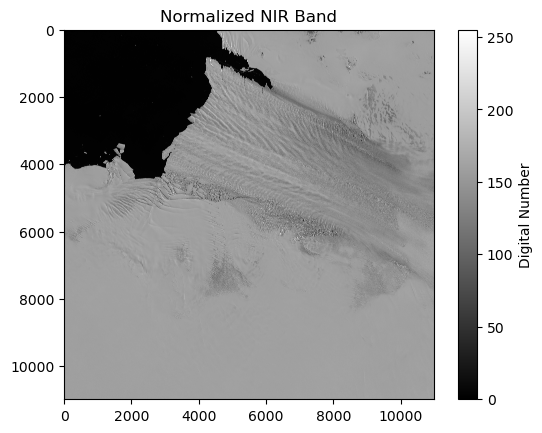

In [54]:
# Band 8 represents VNIR
nir_path = 'PIG_sentinel2/20231213/T14CMB_20231213T144249_B08_10m.jp2'

# Normalize band function remains the same
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the NIR band
with rasterio.open(nir_path) as nir:
    # Read the band
    nir_band = nir.read(1)
    
    # Normalize the band
    nir_band_normalized = normalize_band(nir_band)

    # For a single band, you might just work with the normalized data directly
    # For visualization, you might want to display it using matplotlib
    import matplotlib.pyplot as plt
    
    plt.imshow(nir_band_normalized, cmap='gray')
    plt.title('Normalized NIR Band')
    plt.colorbar(label='Digital Number')
    plt.show()


In [55]:
# Clip the RGB image using the pixel coordinates
NIR_image2023 = nir_band_normalized[row_min:row_max, col_min:col_max]

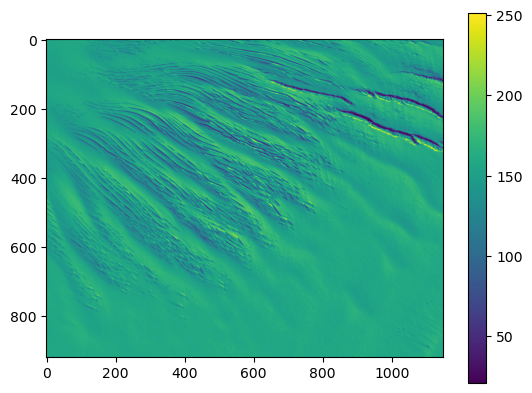

In [56]:
# check, yes that's what we want
plt.imshow(NIR_image2023)
plt.colorbar()

## 2022

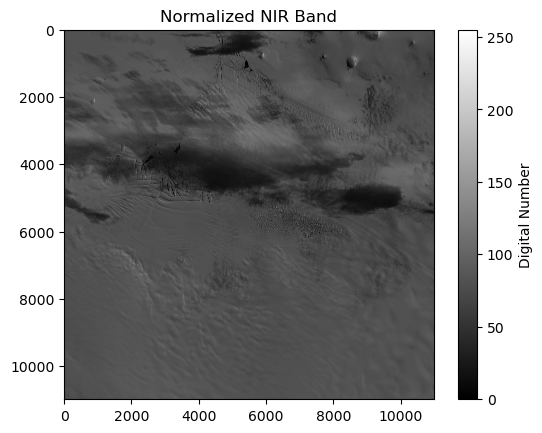

In [57]:
# Assuming Band 8 represents NIR
nir_path = 'PIG_sentinel2/20221019/T14CMB_20221019T144249_B08.jp2'

# Normalize band function remains the same
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the NIR band
with rasterio.open(nir_path) as nir:
    # Read the band
    nir_band = nir.read(1)
    
    # Normalize the band
    nir_band_normalized = normalize_band(nir_band)

    # For a single band, you might just work with the normalized data directly
    # For visualization, you might want to display it using matplotlib
    import matplotlib.pyplot as plt
    
    plt.imshow(nir_band_normalized, cmap='gray')
    plt.title('Normalized NIR Band')
    plt.colorbar(label='Digital Number')
    plt.show()

In [58]:
# Clip the RGB image using the pixel coordinates
NIR_image2022 = nir_band_normalized[row_min:row_max, col_min:col_max]

In [59]:
# # check
# plt.imshow(NIR_image2022)
# plt.colorbar()

## 2021

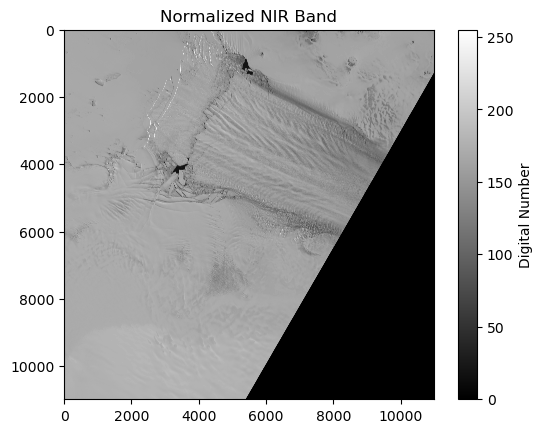

In [60]:
# Assuming Band 8 represents NIR
nir_path = 'PIG_sentinel2/20211222/T14CMB_20211222T151259_B08_10m.jp2'

# Normalize band function remains the same
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the NIR band
with rasterio.open(nir_path) as nir:
    # Read the band
    nir_band = nir.read(1)
    
    # Normalize the band
    nir_band_normalized = normalize_band(nir_band)

    # For a single band, you might just work with the normalized data directly
    # For visualization, you might want to display it using matplotlib
    import matplotlib.pyplot as plt
    
    plt.imshow(nir_band_normalized, cmap='gray')
    plt.title('Normalized NIR Band')
    plt.colorbar(label='Digital Number')
    plt.show()

In [61]:
# Clip the RGB image using the pixel coordinates
NIR_image2021 = nir_band_normalized[row_min:row_max, col_min:col_max]

In [62]:
# # check
# plt.imshow(NIR_image2021)
# plt.colorbar()

## 2020

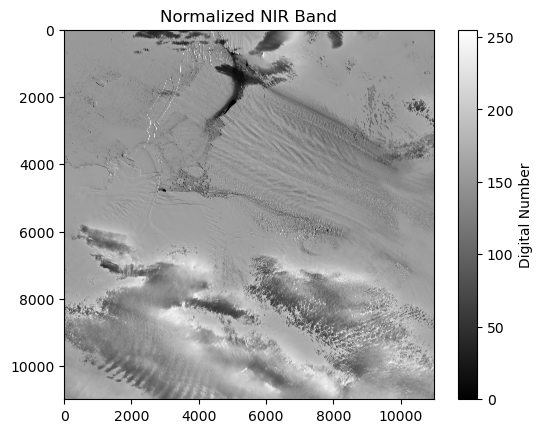

In [63]:
# Assuming Band 8 represents NIR
nir_path = 'PIG_sentinel2/20201211/T14CMB_20201211T145249_B08_10m.jp2'

# Normalize band function remains the same
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the NIR band
with rasterio.open(nir_path) as nir:
    # Read the band
    nir_band = nir.read(1)
    
    # Normalize the band
    nir_band_normalized = normalize_band(nir_band)

    # For a single band, you might just work with the normalized data directly
    # For visualization, you might want to display it using matplotlib
    import matplotlib.pyplot as plt
    
    plt.imshow(nir_band_normalized, cmap='gray')
    plt.title('Normalized NIR Band')
    plt.colorbar(label='Digital Number')
    plt.show()

In [64]:
# Clip the RGB image using the pixel coordinates
NIR_image2020 = nir_band_normalized[row_min:row_max, col_min:col_max]

In [65]:
# # check
# plt.imshow(NIR_image2020)
# plt.colorbar()

## 2019

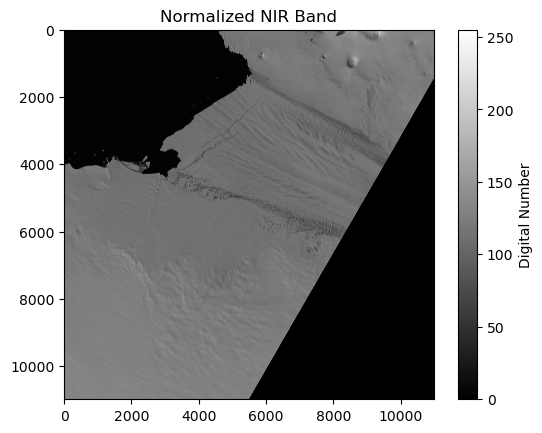

In [66]:
# Assuming Band 8 represents NIR
nir_path = 'PIG_sentinel2/20191223/T14CMB_20191223T151259_B08.jp2'

# Normalize band function remains the same
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the NIR band
with rasterio.open(nir_path) as nir:
    # Read the band
    nir_band = nir.read(1)
    
    # Normalize the band
    nir_band_normalized = normalize_band(nir_band)

    # For a single band, you might just work with the normalized data directly
    # For visualization, you might want to display it using matplotlib
    import matplotlib.pyplot as plt
    
    plt.imshow(nir_band_normalized, cmap='gray')
    plt.title('Normalized NIR Band')
    plt.colorbar(label='Digital Number')
    plt.show()

In [67]:
# Clip the RGB image using the pixel coordinates
NIR_image2019 = nir_band_normalized[row_min:row_max, col_min:col_max]

In [68]:
# # check
# plt.imshow(NIR_image2019)
# plt.colorbar()

## 2018

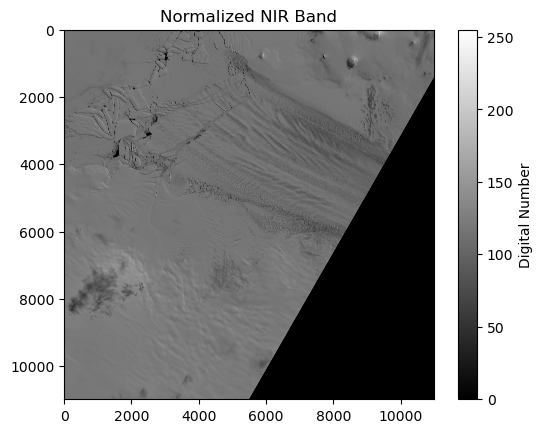

In [69]:
# Assuming Band 8 represents NIR
nir_path = 'PIG_sentinel2/20181118/T14CMB_20181118T151259_B08.jp2'

# Normalize band function remains the same
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the NIR band
with rasterio.open(nir_path) as nir:
    # Read the band
    nir_band = nir.read(1)
    
    # Normalize the band
    nir_band_normalized = normalize_band(nir_band)

    # For a single band, you might just work with the normalized data directly
    # For visualization, you might want to display it using matplotlib
    import matplotlib.pyplot as plt
    
    plt.imshow(nir_band_normalized, cmap='gray')
    plt.title('Normalized NIR Band')
    plt.colorbar(label='Digital Number')
    plt.show()

In [70]:
# Clip the RGB image using the pixel coordinates
NIR_image2018 = nir_band_normalized[row_min:row_max, col_min:col_max]

In [71]:
# # check
# plt.imshow(NIR_image2018)
# plt.colorbar()

## 2017

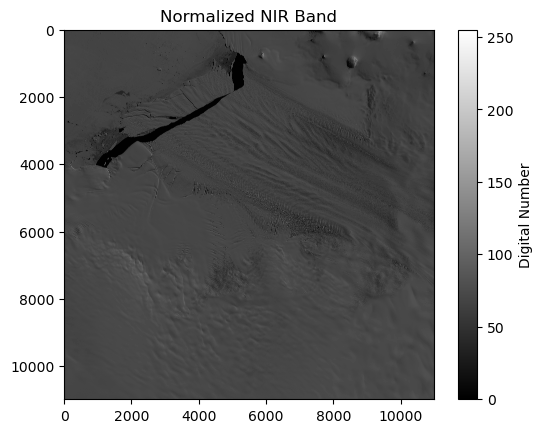

In [72]:
# Assuming Band 8 represents NIR
nir_path = 'PIG_sentinel2/20171013/T14CMB_20171013T145251_B08.jp2'

# Normalize band function remains the same
def normalize_band(band):
    band_min = band.min()
    band_max = band.max()
    return ((band - band_min) / (band_max - band_min) * 255).astype('uint8')

# Open the NIR band
with rasterio.open(nir_path) as nir:
    # Read the band
    nir_band = nir.read(1)
    
    # Normalize the band
    nir_band_normalized = normalize_band(nir_band)

    # For a single band, you might just work with the normalized data directly
    # For visualization, you might want to display it using matplotlib
    import matplotlib.pyplot as plt
    
    plt.imshow(nir_band_normalized, cmap='gray')
    plt.title('Normalized NIR Band')
    plt.colorbar(label='Digital Number')
    plt.show()

In [73]:
# Clip the RGB image using the pixel coordinates
NIR_image2017 = nir_band_normalized[row_min:row_max, col_min:col_max]

In [74]:
# # check
# plt.imshow(NIR_image2017)
# plt.colorbar()

## Add VNIR to existing dataframe containing RBG stats

In [75]:
df

deformation_km  avg_length_segment        year       date    color  \
0       33.405008            2.386072  2017-10-13 2017-10-13  #88CCEE   
1       38.478387            2.748456  2018-11-18 2018-11-18  #44AA99   
2       39.944302            2.853164  2019-12-23 2019-12-23  #117733   
3       62.206645            2.591944  2020-12-11 2020-12-11  #999933   
4      107.361195            4.129277  2021-12-22 2021-12-22  #DDCC77   
5      106.229977            4.249199  2022-10-19 2022-10-19  #CC6677   
6      102.714025            3.950539  2023-12-13 2023-12-13  #882255   

   pixel_variance  pixel_stdev  pixel_mean  pixel_stdev_red  \
0       23.993609     4.898327   78.957887         2.153455   
1       29.525200     5.433710  124.541287         2.715030   
2       53.695897     7.327748  132.616642         2.667171   
3       43.383770     6.586636  168.314684         6.583095   
4       89.177262     9.443371  175.439457         9.592340   
5      104.132246    10.204521   85.302706         9.943992   
6      266.748235    16.332429  160.966236        18.433923   

   pixel_stdev_green  pixel_stdev_blue  pixel_mean_red  pixel_mean_green  \
0           2.083896          1.929232       73.540765         78.904104   
1           2.465127          2.177991      119.109026        123.643589   
2           2.553449          2.356026      124.318887        132.370989   
3           6.054865          5.534926      165.465815        167.822964   
4           8.578346          7.727212      171.118318        174.934260   
5           9.185308          8.430491       80.485888         84.300241   
6          16.188880         13.932878      159.323860        162.090895   

   pixel_mean_blue  
0        84.428792  
1       130.871247  
2       141.160051  
3       171.655274  
4       180.265792  
5        91.121987  
6       161.483952

In [76]:
nirstd17 = np.std(NIR_image2017)
nirstd18 = np.std(NIR_image2018)
nirstd19 = np.std(NIR_image2019)
nirstd20 = np.std(NIR_image2020)
nirstd21 = np.std(NIR_image2021)
nirstd22 = np.std(NIR_image2022)
nirstd23 = np.std(NIR_image2023)

In [77]:
nir_std = [nirstd17,nirstd18,nirstd19,nirstd20,nirstd21,nirstd22,nirstd23]
nir_std

[2.196293185015111,
 3.097706971738735,
 2.6320312531662844,
 7.181614758012251,
 11.462009136051899,
 10.95595649361376,
 20.755382503158817]

In [78]:
# add NIR std
df['nir_std'] = [nirstd17,nirstd18,nirstd19,nirstd20,nirstd21,nirstd22,nirstd23]
df['date'] = pd.to_datetime(df['year'], format='%Y-%m-%d')
df

deformation_km  avg_length_segment        year       date    color  \
0       33.405008            2.386072  2017-10-13 2017-10-13  #88CCEE   
1       38.478387            2.748456  2018-11-18 2018-11-18  #44AA99   
2       39.944302            2.853164  2019-12-23 2019-12-23  #117733   
3       62.206645            2.591944  2020-12-11 2020-12-11  #999933   
4      107.361195            4.129277  2021-12-22 2021-12-22  #DDCC77   
5      106.229977            4.249199  2022-10-19 2022-10-19  #CC6677   
6      102.714025            3.950539  2023-12-13 2023-12-13  #882255   

   pixel_variance  pixel_stdev  pixel_mean  pixel_stdev_red  \
0       23.993609     4.898327   78.957887         2.153455   
1       29.525200     5.433710  124.541287         2.715030   
2       53.695897     7.327748  132.616642         2.667171   
3       43.383770     6.586636  168.314684         6.583095   
4       89.177262     9.443371  175.439457         9.592340   
5      104.132246    10.204521   85.302706         9.943992   
6      266.748235    16.332429  160.966236        18.433923   

   pixel_stdev_green  pixel_stdev_blue  pixel_mean_red  pixel_mean_green  \
0           2.083896          1.929232       73.540765         78.904104   
1           2.465127          2.177991      119.109026        123.643589   
2           2.553449          2.356026      124.318887        132.370989   
3           6.054865          5.534926      165.465815        167.822964   
4           8.578346          7.727212      171.118318        174.934260   
5           9.185308          8.430491       80.485888         84.300241   
6          16.188880         13.932878      159.323860        162.090895   

   pixel_mean_blue    nir_std  
0        84.428792   2.196293  
1       130.871247   3.097707  
2       141.160051   2.632031  
3       171.655274   7.181615  
4       180.265792  11.462009  
5        91.121987  10.955956  
6       161.483952  20.755383

## Now plot spectral info -- we are interested in pixel standard deviation through time

In [79]:
df['year']

0    2017-10-13
1    2018-11-18
2    2019-12-23
3    2020-12-11
4    2021-12-22
5    2022-10-19
6    2023-12-13
Name: year, dtype: object

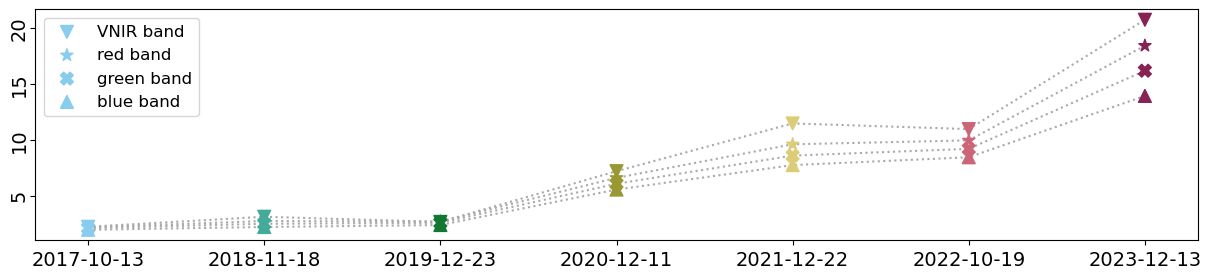

In [80]:
plt.figure(figsize=(15, 3))

plt.plot(df['year'], df['nir_std'],  ':', color='darkgrey', zorder=1)
plt.scatter(df['year'], df['nir_std'], marker = 'v', c=df['color'], s=85, zorder=2,label= 'VNIR band')

plt.plot(df['year'], df['pixel_stdev_red'],  ':', color='darkgrey', zorder=1)
plt.scatter(df['year'], df['pixel_stdev_red'], marker = '*',c=df['color'], s=85, zorder=2, label= 'red band')

plt.plot(df['year'], df['pixel_stdev_green'],  ':', color='darkgrey', zorder=1)
plt.scatter(df['year'], df['pixel_stdev_green'], marker = 'X', c=df['color'], s=85, zorder=2,label= 'green band')

plt.plot(df['year'], df['pixel_stdev_blue'],  ':', color='darkgrey', zorder=1)
plt.scatter(df['year'], df['pixel_stdev_blue'], marker = '^', c=df['color'], s=85, zorder=2,label= 'blue band')


# plt.plot(df['year'], df['pixel_stdev'],  ':', color='k', zorder=1)
# plt.scatter(df['year'], df['pixel_stdev'], c= 'k', s=85, zorder=2,label= 'rgb composite')

# Get the current axis
ax = plt.gca()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='y', labelsize=14,rotation=90,pad=1)

# Centering y-axis labels
for label in ax.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')

# # # Format x-axis as years
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# # calving events
# ax.axvline(datetime.datetime(2017, 10, 1), c='lightgrey', alpha=0.8, linewidth=3, zorder=-1)
# ax.axvline(datetime.datetime(2018, 10, 28), c='lightgrey', alpha=0.8, linewidth=3,zorder=-1)
# ax.axvline(datetime.datetime(2020, 2, 10), c='lightgrey', alpha=0.8, linewidth=3,zorder=-1)

#plt.ylabel('Pixel standard deviation', fontsize=14)
plt.legend(loc='upper left', fontsize=12)

# Display the plot
#plt.savefig('spectral_deform_addNIR_cupdate.png', format='png', dpi=400)
